In [1]:
import pandas as pd
import numpy as np
import os
import urllib

In [2]:
url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"

In [3]:
file_path = os.path.join("data","covid")

In [4]:
os.makedirs(file_path, exist_ok=True)

In [5]:
csv_path = os.path.join(file_path,"WHO-COVID-19-global-data.csv")

In [6]:
urllib.request.urlretrieve(url,csv_path)

('data\\covid\\WHO-COVID-19-global-data.csv',
 <http.client.HTTPMessage at 0x15539046ac8>)

In [7]:
df = pd.read_csv(csv_path)

In [8]:
df.shape

(74853, 8)

In [9]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [10]:
df.isnull().sum()

Date_reported           0
 Country_code         318
 Country                0
 WHO_region             0
 New_cases              0
 Cumulative_cases       0
 New_deaths             0
 Cumulative_deaths      0
dtype: int64

In [11]:
df.dtypes

Date_reported         object
 Country_code         object
 Country              object
 WHO_region           object
 New_cases             int64
 Cumulative_cases      int64
 New_deaths            int64
 Cumulative_deaths     int64
dtype: object

In [12]:
df.columns

Index(['Date_reported', ' Country_code', ' Country', ' WHO_region',
       ' New_cases', ' Cumulative_cases', ' New_deaths', ' Cumulative_deaths'],
      dtype='object')

In [13]:
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

### Top 5 Countries

In [14]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [15]:
top_5_countries = list(df.groupby(by='Country_code').max().sort_values(by='Cumulative_cases', ascending=False).head().index)

In [16]:
top_5_countries

['US', 'IN', 'BR', 'RU', 'FR']

In [17]:
df_top5 = df[df['Country_code'].isin(top_5_countries)]

In [18]:
df_top5.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
8920,2020-01-03,BR,Brazil,AMRO,0,0,0,0
8921,2020-01-04,BR,Brazil,AMRO,0,0,0,0
8922,2020-01-05,BR,Brazil,AMRO,0,0,0,0
8923,2020-01-06,BR,Brazil,AMRO,0,0,0,0
8924,2020-01-07,BR,Brazil,AMRO,0,0,0,0


In [19]:
import matplotlib.pyplot as plt

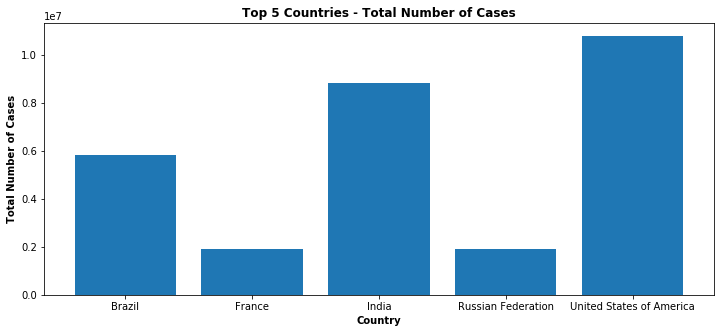

In [20]:
plt.figure(figsize=(12,5))
plt.bar(df_top5['Country'],df_top5['Cumulative_cases'])
plt.xlabel('Country',fontdict={'fontweight':'semibold'})
plt.ylabel('Total Number of Cases',fontdict={'fontweight':'semibold'})
plt.title('Top 5 Countries - Total Number of Cases',fontdict={'fontweight':'bold'})
plt.show()

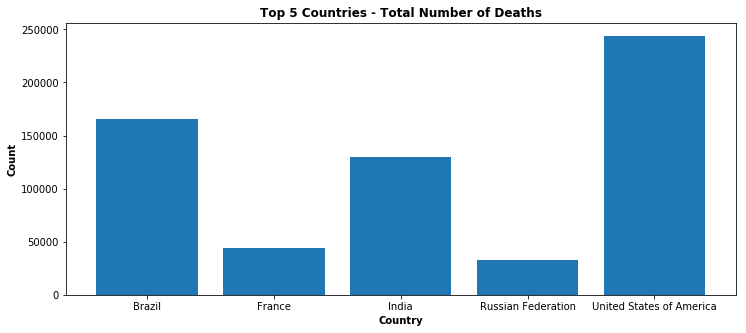

In [21]:
plt.figure(figsize=(12,5))
plt.bar(df_top5['Country'],df_top5['Cumulative_deaths'])
plt.xlabel('Country',fontdict={'fontweight':'semibold'})
plt.ylabel('Count',fontdict={'fontweight':'semibold'})
plt.title('Top 5 Countries - Total Number of Deaths',fontdict={'fontweight':'bold'})
plt.show()

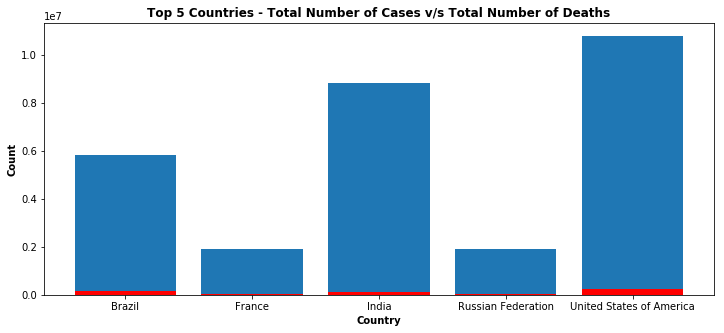

In [22]:
plt.figure(figsize=(12,5))
plt.bar(df_top5['Country'],df_top5['Cumulative_cases'])
plt.bar(df_top5['Country'],df_top5['Cumulative_deaths'],color='r')
plt.xlabel('Country',fontdict={'fontweight':'semibold'})
plt.ylabel('Count',fontdict={'fontweight':'semibold'})
plt.title('Top 5 Countries - Total Number of Cases v/s Total Number of Deaths',fontdict={'fontweight':'bold'})
plt.show()

In [23]:
df_fatality_rate = df_top5.groupby(by=['Country_code']).max()[['Country','Cumulative_deaths','Cumulative_cases']]

In [24]:
df_fatality_rate['Fatality_rate'] = (df_fatality_rate['Cumulative_deaths']/df_fatality_rate['Cumulative_cases'])*100
df_fatality_rate

,Country,Cumulative_deaths,Cumulative_cases,Fatality_rate
Country_code,,,,
BR,Brazil,165658,5848959,2.832265
FR,France,43913,1918345,2.289109
IN,India,130070,8845127,1.470527
RU,Russian Federation,33186,1925825,1.723210
US,United States of America,243758,10796432,2.257764


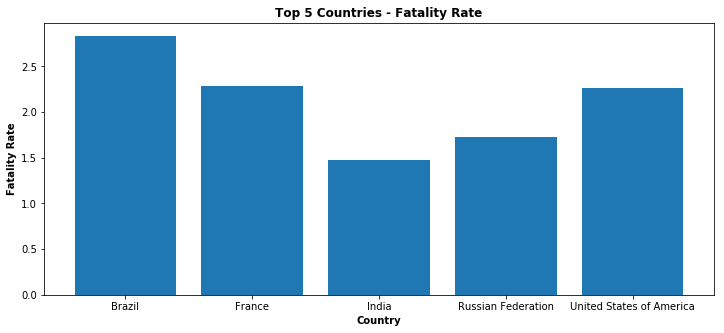

In [25]:
plt.figure(figsize=(12,5))
plt.bar(df_fatality_rate['Country'],df_fatality_rate['Fatality_rate'])
plt.xlabel('Country', fontdict={'fontweight':'semibold'})
plt.ylabel('Fatality Rate', fontdict={'fontweight':'semibold'})
plt.title('Top 5 Countries - Fatality Rate', fontdict={'fontweight':'semibold'})
plt.show()

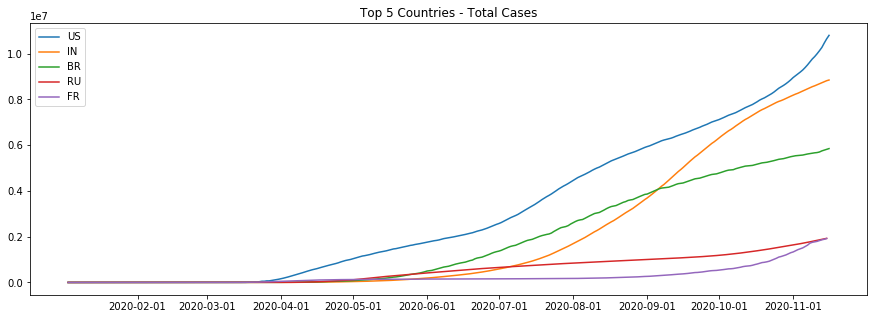

In [26]:
plt.figure(figsize=(15,5))

for i in top_5_countries:
    plt.plot(df_top5.loc[df_top5['Country_code']==i]['Date_reported'], df_top5.loc[df_top5['Country_code']==i]['Cumulative_cases'])

plt.legend(top_5_countries)

plt.xticks(['2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
            '2020-09-01','2020-10-01','2020-11-01'])

plt.title('Top 5 Countries - Total Cases')

plt.show()

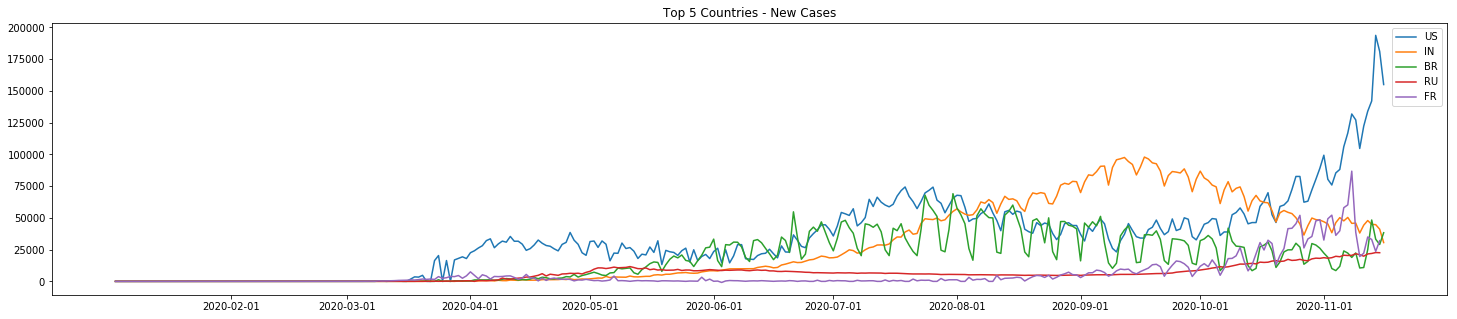

In [27]:
plt.figure(figsize=(25,5))

for i in top_5_countries:
    plt.plot(df_top5.loc[df_top5['Country_code']==i]['Date_reported'], df_top5.loc[df_top5['Country_code']==i]['New_cases'])

plt.legend(top_5_countries)

plt.xticks(['2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
            '2020-09-01','2020-10-01','2020-11-01'])

# import numpy as np
# import calendar
# plt.xticks(calendar.month_name[1:13])
plt.title('Top 5 Countries - New Cases')

plt.show()

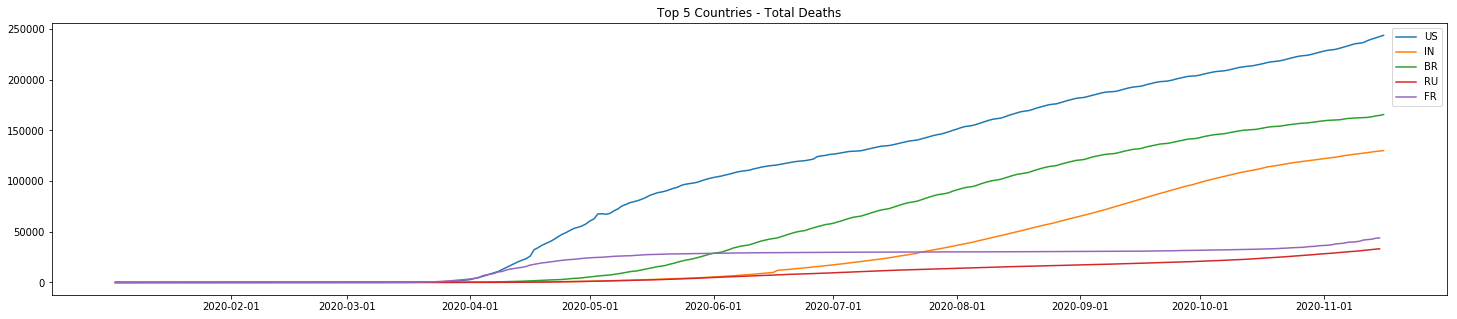

In [28]:
plt.figure(figsize=(25,5))

for i in top_5_countries:
    plt.plot(df_top5.loc[df_top5['Country_code']==i]['Date_reported'], df_top5.loc[df_top5['Country_code']==i]['Cumulative_deaths'])

plt.legend(top_5_countries)

plt.xticks(['2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
            '2020-09-01','2020-10-01','2020-11-01'])

plt.title('Top 5 Countries - Total Deaths')

plt.show()

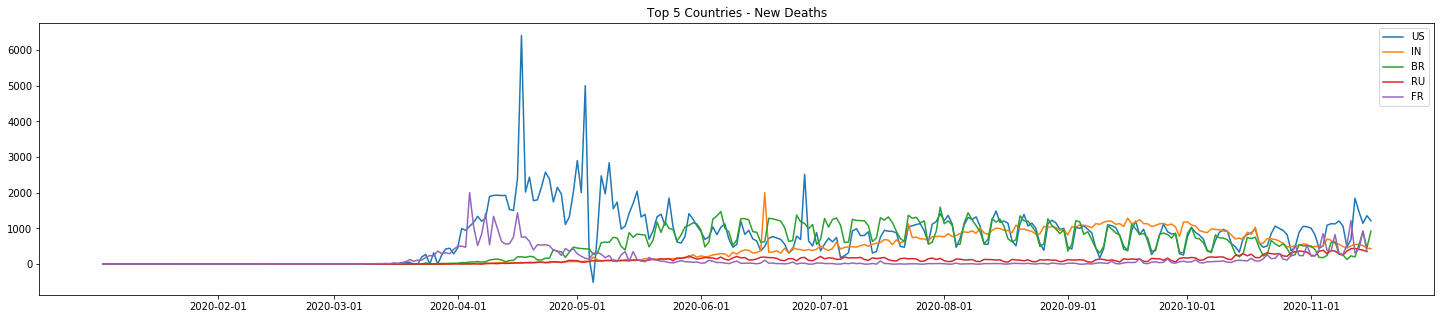

In [29]:
plt.figure(figsize=(25,5))

for i in top_5_countries:
    plt.plot(df_top5.loc[df_top5['Country_code']==i]['Date_reported'], df_top5.loc[df_top5['Country_code']==i]['New_deaths'])

plt.legend(top_5_countries)

plt.xticks(['2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
            '2020-09-01','2020-10-01','2020-11-01'])

plt.title('Top 5 Countries - New Deaths')

plt.show()

In [30]:
df_top5.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
8920,2020-01-03,BR,Brazil,AMRO,0,0,0,0
8921,2020-01-04,BR,Brazil,AMRO,0,0,0,0
8922,2020-01-05,BR,Brazil,AMRO,0,0,0,0
8923,2020-01-06,BR,Brazil,AMRO,0,0,0,0
8924,2020-01-07,BR,Brazil,AMRO,0,0,0,0


In [31]:
df_top5.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [32]:
df_top5['Date_reported_date_format'] = pd.to_datetime(df_top5['Date_reported'])

C:\Users\pmaht\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_top5['Date_reported_date_format'].dtype

dtype('<M8[ns]')

In [34]:
df_top5.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date_reported_date_format
8920,2020-01-03,BR,Brazil,AMRO,0,0,0,0,2020-01-03
8921,2020-01-04,BR,Brazil,AMRO,0,0,0,0,2020-01-04
8922,2020-01-05,BR,Brazil,AMRO,0,0,0,0,2020-01-05
8923,2020-01-06,BR,Brazil,AMRO,0,0,0,0,2020-01-06
8924,2020-01-07,BR,Brazil,AMRO,0,0,0,0,2020-01-07
